In [51]:
import pyemma
import glob
import numpy as np
import pyemma.plots as mplt
%pylab inline
import mdtraj as md
import pyemma.coordinates as coor
 
def average_by_state(dtraj, x, nstates):
    assert(len(dtraj) == len(x))
    N = len(dtraj)
    res = np.zeros((nstates))
    for i in range(nstates):
        I = np.argwhere(dtraj == i)[:,0]
        res[i] = np.mean(x[I])
    return res
 
def avg_by_set(x, sets):
    # compute mean positions of sets. This is important because of some technical points the set order
    # in the coarse-grained TPT object can be different from the input order.
    avg = np.zeros(len(sets))
    for i in range(len(sets)):
        I = list(sets[i])
        avg[i] = np.mean(x[I])
    return avg

Populating the interactive namespace from numpy and matplotlib


In [52]:
#Makes a list of nested lists for 5 mds, and 5 .nc files in each
trajfile = []
for i in range(1,6):
    nc_list = []
    for k in range(1,6):
        path = "/net/jam-amaro-shared/bccgc4/CatSMD/md"+str(i)+"/"+str(k)+".nc"
        nc_list.append(path)
    trajfile.append(nc_list)
    
#print(trajfile)

#assigns the features
feat = coor.featurizer("/net/jam-amaro-shared/bccgc4/CatSMD/md1/system.prmtop")
feat.add_residue_mindist([[146,187],[116,136],[142,143],[71,212],[27,29],[117,187],[64,160],[119,20],[216,191],[24,146],[114,119]], scheme="closest-heavy")
print(feat.describe()[:13])
#selecting distances at minimum & closest heavy atoms
    
#feat.add_minrmsd_to_ref(traj[0])
inp = coor.source(trajfile, feat)
print(inp)
print('trajectory length = ',inp.trajectory_length(0))
print('number of dimension = ',inp.dimension())
  



[['/net/jam-amaro-shared/bccgc4/CatSMD/md1/1.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md1/2.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md1/3.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md1/4.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md1/5.nc'], ['/net/jam-amaro-shared/bccgc4/CatSMD/md2/1.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md2/2.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md2/3.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md2/4.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md2/5.nc'], ['/net/jam-amaro-shared/bccgc4/CatSMD/md3/1.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md3/2.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md3/3.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md3/4.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md3/5.nc'], ['/net/jam-amaro-shared/bccgc4/CatSMD/md4/1.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md4/2.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md4/3.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md4/4.nc', '/net/jam-amaro-shared/bccgc4/CatSMD/md4/5.nc'], ['/net/jam-amaro-shared/bccgc4/

In [66]:
lag=1000
tica_obj = coor.tica(inp, lag=lag, var_cutoff=0.95, kinetic_map=False)
# here we get the data that has been projected onto the first 2 IC's. It's a list, because we could generally
# have a list of trajectories, so we just get the first element.
Y = tica_obj.get_output()
print('Projected data shape = ', Y.shape)

print('Mean values: ', np.mean(Y, axis=0))
print('Variances:   ', np.var(Y, axis=0))
print(-lag/np.log(tica_obj.eigenvalues[:5]))
 
# histogram data
z,x,y = np.histogram2d(Y[:,0],Y[:,1], bins=50)
# compute free energies
F = -np.log(z)
# contour plot
extent = [x[0], x[-1], y[0], y[-1]]
contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)

#making clusters from kmeans
cl = coor.cluster_kmeans(data=Y,k=10)

#cl=coor.cluster_uniform_time(data=Y, )
# for later use we save the discretetrajectories (dtrajs) and cluster center coordinates:
dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]
 
#plotting out the results and clustercenters 
contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
plot(cc_x,cc_y, linewidth=0, marker='o')
 
print(dtrajs)
print(np.size(dtrajs))


AttributeError: 'list' object has no attribute 'shape'

10-11-18 21:39:37 pyemma.coordinates.clustering.kmeans.KmeansClustering[76] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


[array([0, 0, 0, ..., 8, 8, 5], dtype=int32), array([0, 0, 0, ..., 7, 7, 1], dtype=int32), array([0, 0, 0, ..., 6, 6, 6], dtype=int32), array([0, 0, 0, ..., 8, 2, 2], dtype=int32), array([0, 0, 0, ..., 6, 5, 9], dtype=int32)]
450000


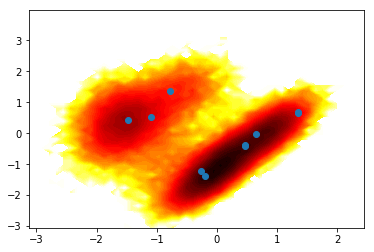

In [67]:
cl = coor.cluster_kmeans(data=Y,k=10)

#cl=coor.cluster_uniform_time(data=Y, )
# for later use we save the discretetrajectories (dtrajs) and cluster center coordinates:
dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]
 
#plotting out the results and clustercenters 
contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
plot(cc_x,cc_y, linewidth=0, marker='o')
 
print(dtrajs)
print(np.size(dtrajs))

[-1.477317    0.46967688  1.3487787  -1.0906587  -0.78296345  0.654191
 -0.26333734 -0.20036615  1.33917     0.4688478 ]
[ 0.4292571  -0.3879486   0.6676682   0.5185451   1.3539321  -0.03853653
 -1.2127491  -1.386519    0.68939865 -0.40003198]


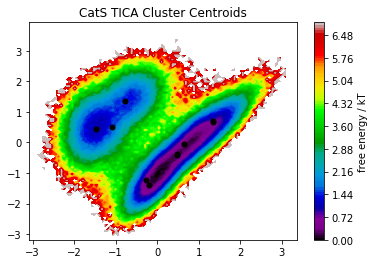

In [69]:
#plots free energy diagram
fig, axes= mplt.plot_free_energy(np.vstack(Y)[:,0], np.vstack(Y)[:,1])
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]
plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')
title("CatS TICA Cluster Centroids" )

fig.savefig("tica_FE.png", dpi = 100)

print(cc_x)
print(cc_y)

In [70]:
#This tells us how much each feature contributes to each TIC
tica_obj.feature_TIC_correlation

array([[-7.87387408e-02, -3.68212266e-02, -2.35290772e-03],
       [-3.76031836e-02,  5.99394478e-04,  3.38061107e-02],
       [-6.46345438e-03, -1.96376026e-03, -2.17023188e-03],
       [-8.00493419e-01,  5.78973509e-01,  6.27073917e-02],
       [ 8.10931749e-02,  6.79184138e-02,  2.74853845e-02],
       [-1.11191129e-02,  1.14119456e-02,  3.37291436e-02],
       [ 6.22111594e-01,  7.36973140e-01,  4.36155321e-02],
       [ 1.47632245e-01, -2.81385849e-01, -1.03837994e-01],
       [-9.18043855e-02, -9.94803241e-02,  3.66813226e-02],
       [-1.95983013e-01, -1.36016416e-01,  1.30610116e-02],
       [ 7.38214829e-02, -9.03526272e-03,  9.86100963e-01]])

In [71]:
#This tells us the number of TICs TICA produces to retain the variance we want, which is .95
tica_obj.cumvar

array([0.62313897, 0.86850045, 0.97029445, 0.98760017, 0.99341148,
       0.99699391, 0.99849689, 0.99953202, 0.99997108, 0.99999433,
       1.        ])

In [73]:
#This prints the discrete trajectories we saved out before, then prints the maximum of them...
print(dtrajs)
#dtraj=max(dtrajs)
#print(dtraj)

[array([0, 0, 0, ..., 8, 8, 5], dtype=int32), array([0, 0, 0, ..., 7, 7, 1], dtype=int32), array([0, 0, 0, ..., 6, 6, 6], dtype=int32), array([0, 0, 0, ..., 8, 2, 2], dtype=int32), array([0, 0, 0, ..., 6, 5, 9], dtype=int32)]


In [ ]:
#From here on it's clustering and extracting centroids, as well as saving out the centroid coords

In [ ]:
#makes dictionary for each cluster and frames in each cluster
Clusters={}

for count in range(0,10):
    frames=[]
    indices = [d for d, x in enumerate(dtraj) if x == count]
    frames.append(indices)
    Clusters[count]=frames
#print(Clusters)

traj=md.load("/net/jam-amaro-shared/bccgc4/Strided_Traj/joined_traj_all.xtc", top="/net/jam-amaro-shared/bccgc4/Strided_Traj/system.prmtop")

#makes .xtc's out of each cluster
for key in Clusters:
    print(key)
    a=traj[Clusters[key]]
    print(a)
    a.save_xtc('cluster_trajs/Trajcluster_all'+str(key)+".xtc")

In [ ]:
#saving cluster centroids as pdbs for 10 clusters
avg = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
indices = np.zeros(10)
for i in range(len(Y)):
    c = cl.clustercenters[cl.dtrajs[0][i]]
    
    v = Y[i]
    
    newavg = np.linalg.norm(c-v)
   
    if avg[cl.dtrajs[0][i]] > newavg:
        avg[cl.dtrajs[0][i]] = newavg
        indices[cl.dtrajs[0][i]] = i
        
print(avg)
print(indices)

traj=md.load("/net/jam-amaro-shared/bccgc4/Strided_Traj/joined_traj_all.xtc", top="/net/jam-amaro-shared/bccgc4/Strided_Traj/system.prmtop")

for i in range(len(avg)):
    traj[i].save_pdb('rep_struct/testing_pdb_res%s.pdb' % i)

In [ ]:
import glob

path="/home/jegan/Documents/TICA/*.xtc"

files=glob.glob(path)

print(files)

In [49]:
#writing a string to select the features in vmd
poc = [[146,187],[116,136],[142,143],[71,212],[27,29],[117,187],[64,160],[119,20],[216,191],[24,146],[114,119]]

pock = []
for i in poc:
    for k in i:
        phrase = "resid "+str(k)+" or "
        pock.append(phrase)

f= open("vmd_poc_string.txt", "w+")

for y in pock:
    f.write(y)
    
f.close()
    